Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 13131 images belonging to 4 classes.
Found 768 images belonging to 4 classes.
Found 1547 images belonging to 4 classes.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_128            │ (None, 4, 4, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 20480)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     2,621,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,880,068 (18.62 MB)

 Trainable params: 2,622,084 (10.00 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
411/411 ━━━━━━━━━━━━━━━━━━━━ 4140s 10s/step - accuracy: 0.8197 - loss: 0.5111 - val_accuracy: 0.9635 - val_loss: 0.1029
Epoch 2/10
411/411 ━━━━━━━━━━━━━━━━━━━━ 285s 694ms/step - accuracy: 0.9487 - loss: 0.1389 - val_accuracy: 0.9648 - val_loss: 0.0871
Epoch 3/10
411/411 ━━━━━━━━━━━━━━━━━━━━ 315s 677ms/step - accuracy: 0.9566 - loss: 0.1084 - val_accuracy: 0.9674 - val_loss: 0.0761
Epoch 4/10
411/411 ━━━━━━━━━━━━━━━━━━━━ 314s 658ms/step - accuracy: 0.9639 - loss: 0.0980 - val_accuracy: 0.9622 - val_loss: 0.0882
Epoch 5/10
411/411 ━━━━━━━━━━━━━━━━━━━━ 260s 632ms/step - accuracy: 0.9692 - loss: 0.0752 - val_accuracy: 0.9727 - val_loss: 0.0755
Epoch 6/10
411/411 ━━━━━━━━━━━━━━━━━━━━ 262s 631ms/step - accuracy: 0.9750 - loss: 0.0665 - val_accuracy: 0.9661 - val_loss: 0.0948
Epoch 7/10
411/411 ━━━━━━━━━━━━━━━━━━━━ 272s 656ms/step - accuracy: 0.9751 - loss: 0.0644 - val_accuracy: 0.9727 - val_loss: 0.0771
Epoch 8/10
411/411 ━━━━━━━━━━━━━━━━━━━━ 255s 620ms/step - accuracy: 0.9784 - 

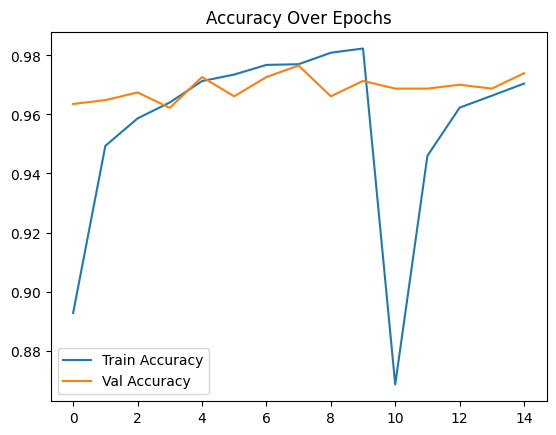

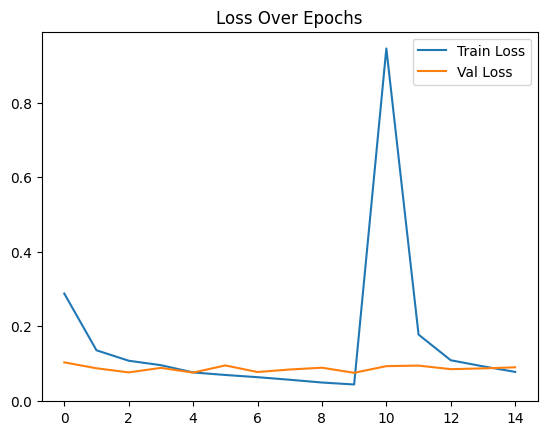

49/49 ━━━━━━━━━━━━━━━━━━━━ 31s 505ms/step


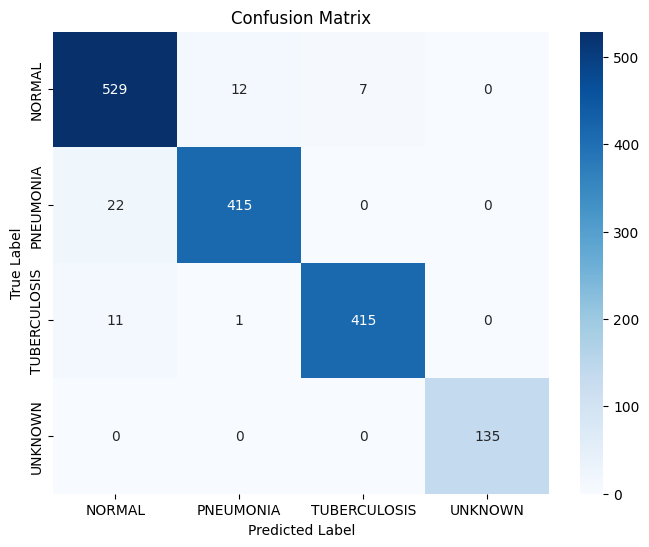

Classification Report:

              precision    recall  f1-score   support

      NORMAL       0.94      0.97      0.95       548
   PNEUMONIA       0.97      0.95      0.96       437
TUBERCULOSIS       0.98      0.97      0.98       427
     UNKNOWN       1.00      1.00      1.00       135

    accuracy                           0.97      1547
   macro avg       0.97      0.97      0.97      1547
weighted avg       0.97      0.97      0.97      1547



In [7]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from google.colab import drive
import os

# 1. Mount Google Drive
drive.mount('/content/drive')

# 2. Paths
base_path = '/content/drive/MyDrive/MLAI/lungs_disease'
train_dir = os.path.join(base_path, 'train')
val_dir = os.path.join(base_path, 'val')
test_dir = os.path.join(base_path, 'test')

# 3. Image Settings
img_size = 128
batch_size = 32
num_classes = 4

# 4. Data Generators
data_generator = ImageDataGenerator(rescale=1./255)

train_gen = data_generator.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical'
)

val_gen = data_generator.flow_from_directory(
    val_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical'
)

test_gen = data_generator.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# 5. Load MobileNetV2
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))
base_model.trainable = False  # Freeze base layers

# 6. Build Model
model = Sequential([
    base_model,
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# 7. Callbacks
checkpoint_path = '/content/drive/MyDrive/MLAI/lung_mobilenet_best.keras'
callbacks = [
    EarlyStopping(patience=5, restore_best_weights=True, monitor='val_loss'),
    ModelCheckpoint(checkpoint_path, save_best_only=True, monitor='val_loss')
]

# 8. Initial Training
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10,
    callbacks=callbacks,
    verbose=1
)

# 9. Fine-tune last 20 layers
base_model.trainable = True
for layer in base_model.layers[:-20]:
    layer.trainable = False

model.compile(optimizer=Adam(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

fine_tune_history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=5,
    callbacks=callbacks,
    verbose=1
)

# 10. Evaluate on Test Data
test_loss, test_acc = model.evaluate(test_gen)
print(f"\n✅ Test Accuracy: {test_acc*100:.2f}%")

# 11. Save Final Model
model.save('/content/drive/MyDrive/MLAI/lung_mobilenet_final.keras')

# 12. Plot Accuracy & Loss
plt.plot(history.history['accuracy'] + fine_tune_history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'] + fine_tune_history.history['val_accuracy'], label='Val Accuracy')
plt.title("Accuracy Over Epochs")
plt.legend()
plt.show()

plt.plot(history.history['loss'] + fine_tune_history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'] + fine_tune_history.history['val_loss'], label='Val Loss')
plt.title("Loss Over Epochs")
plt.legend()
plt.show()

# 13. Confusion Matrix
y_true = test_gen.classes
y_pred_probs = model.predict(test_gen)
y_pred = np.argmax(y_pred_probs, axis=1)

cm = confusion_matrix(y_true, y_pred)
class_names = list(test_gen.class_indices.keys())

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

# 14. Classification Report
print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names))


In [8]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Load your saved model (if needed)
# model = tf.keras.models.load_model('/content/drive/MyDrive/MLAI/lung_mobilenet_final.keras')

# Prediction labels (ensure same order as training generator)
class_labels = list(train_gen.class_indices.keys())

def predict_lung_disease(img_path):
    # Load image and preprocess
    img = image.load_img(img_path, target_size=(128, 128))
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0  # Normalize
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Predict
    prediction = model.predict(img_array)
    predicted_class = class_labels[np.argmax(prediction)]
    confidence = np.max(prediction) * 100

    # Output
    print(f"✅ Predicted Class: {predicted_class}")
    print(f"🔍 Confidence: {confidence:.2f}%")
    return predicted_class, confidence

In [10]:
predict_lung_disease('/content/drive/MyDrive/MLAI/lungs_disease/test/TUBERCULOSIS/118.png')

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
✅ Predicted Class: TUBERCULOSIS
🔍 Confidence: 96.47%


('TUBERCULOSIS', np.float32(96.46702))

In [11]:
predict_lung_disease('/content/drive/MyDrive/MLAI/lungs_disease/test/PNEUMONIA/person102_virus_189.jpeg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
✅ Predicted Class: NORMAL
🔍 Confidence: 94.92%


('NORMAL', np.float32(94.91548))

In [12]:
predict_lung_disease('/content/drive/MyDrive/MLAI/lungs_disease/test/UNKNOWN/0009.png')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
✅ Predicted Class: UNKNOWN
🔍 Confidence: 100.00%


('UNKNOWN', np.float32(100.0))